In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import json
from scipy.stats import sem
import math


In [9]:
# Load predicted temperature changes saved from climate data API:

temperatures_df = pd.read_csv('../1_Input/DF_Interim/temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')
temperatures_df_means = pd.read_csv('../1_Input/DF_Interim/mean_temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')
temperatures_df_stderr = pd.read_csv('../1_Input/DF_Interim/stderr_temperature_changes_world_bank_climate_api_NP.csv', encoding='utf-8')


In [10]:
# Quick view of data / ensuring things are as expected:
print(temperatures_df.loc[0:4, ['Years'] + list(temperatures_df.columns)[0:4]])
print(temperatures_df.shape)
print(temperatures_df_means.iloc[0:4, 0:4])
print(temperatures_df_means.shape)
print(temperatures_df_stderr.iloc[0:4, 0:4])
print(temperatures_df_stderr.shape)


       Years  Afghanistan   Albania   Algeria  American Samoa (U.S.)
0  2020-2039     0.988564  1.039408  1.022495               0.729553
1  2020-2039     0.896385  1.057861  0.860171               0.732849
2  2020-2039     2.136041  1.411377  1.926978               0.896240
3  2020-2039     1.901974  1.121633  1.514303               0.845367
4  2020-2039     1.271146  1.292928  1.420835               0.907104
(112, 241)
   Afghanistan   Albania   Algeria  American Samoa (U.S.)
0     1.482653  1.222877  1.359490               0.776657
1     2.223555  1.937871  2.060303               1.194559
2     3.168366  2.713478  2.932578               1.677473
3     4.074688  3.506674  3.810633               2.162735
(4, 240)
   Afghanistan   Albania   Algeria  American Samoa (U.S.)
0     0.060522  0.057254  0.050821               0.027384
1     0.088194  0.081597  0.079713               0.036451
2     0.137904  0.127967  0.129546               0.072177
3     0.233500  0.203893  0.220766          

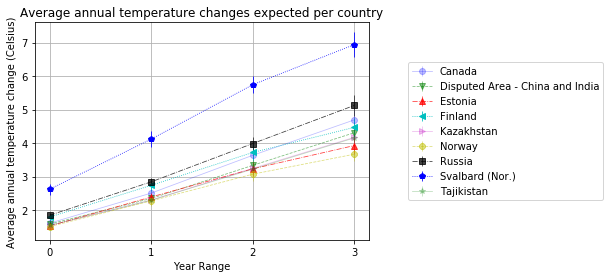

In [11]:
# Plot temperature changes per country - focus on the ones that are most affected by climate change

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
filled_markers = filled_markers * math.ceil(len(temperatures_df_means.columns) / len(filled_markers))
linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] * math.ceil(len(temperatures_df_means.columns) / 4)
fillstyles = ['full', 'left', 'right', 'bottom','top', 'none'] * math.ceil(len(temperatures_df_means.columns) / 6)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * math.ceil(len(temperatures_df_means.columns) / 7) # exclude white of course
alphas = [0.25,0.5,0.75,1] * math.ceil(len(temperatures_df_means.columns) / 4)

art_counter = -1
for i in np.arange(len(temperatures_df_means.columns)):
    if temperatures_df_means.iloc[0,i] >= 1.5:   # Too many countries to plot... 
                                                 # let's just focus on countries 
                                                 # where the expected temp increase 
                                                 # is at least 1.5 degrees Celsius
        art_counter += 1
        plt.errorbar(np.arange(len(temperatures_df_means.index)), temperatures_df_means.iloc[:,i], 
                     yerr=temperatures_df_stderr.iloc[:,i], label=temperatures_df_means.columns[i], 
                     marker=filled_markers[art_counter], linewidth=0.8, 
                     linestyle=linestyles[art_counter], color=colours[art_counter], alpha=alphas[art_counter])
plt.title('Average annual temperature changes expected per country')
plt.xlabel('Year Range')
plt.ylabel('Average annual temperature change (Celsius)')
plt.xticks(np.arange(len(temperatures_df_means.index)),temperatures_df_means.index)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid()
plt.savefig("../6_Output/Average_annual_temp_change_prediction_per_country2_NP.png", bbox_inches='tight')
plt.show()

In [12]:
# Load predicted precipitation changes per country saved from climate data API:

final_precipitations_means_df = pd.read_csv('../1_Input/DF_Interim/mean_precipitation_changes_NP.csv', encoding='utf-8')
final_precipitations_stderr_df = pd.read_csv('../1_Input/DF_Interim/stderr_precipitation_changes_NP.csv', encoding='utf-8')


In [13]:
# Quick view of data / ensuring things are as expected:

print(final_precipitations_means_df.iloc[0:4, 0:4])
print(final_precipitations_means_df.shape)
print(final_precipitations_stderr_df.iloc[0:4, 0:4])
print(final_precipitations_stderr_df.shape)


   Afghanistan     Albania    Algeria  American Samoa (U.S.)
0    -3.513526  -42.419139  -5.331772              63.860499
1    -6.432855  -58.816210  -7.001998              87.942769
2   -21.523026  -85.910413 -15.125900              86.736434
3   -28.930377 -115.050994 -19.460954             109.103369
(4, 240)
   Afghanistan    Albania   Algeria  American Samoa (U.S.)
0     5.214904   5.817850  1.968955              24.401237
1     5.001746   7.303921  2.573960              27.230839
2     6.746446   9.382676  2.771710              47.997697
3     7.279784  14.273374  3.675007              59.291723
(4, 240)


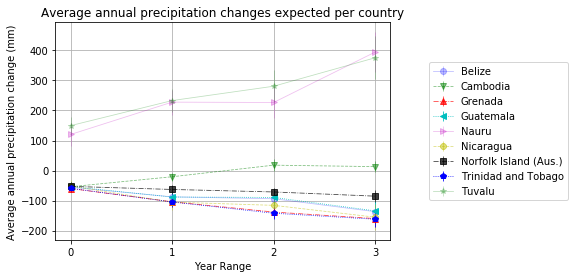

In [14]:
# Plot precipitation changes per country - focus on the ones that are most affected by climate change

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
filled_markers = filled_markers * math.ceil(len(final_precipitations_means_df.columns) / len(filled_markers))
linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] * math.ceil(len(final_precipitations_means_df.columns) / 4)
fillstyles = ['full', 'left', 'right', 'bottom','top', 'none'] * math.ceil(len(final_precipitations_means_df.columns) / 6)
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * math.ceil(len(final_precipitations_means_df.columns) / 7) # exclude white of course
alphas = [0.25,0.5,0.75,1] * math.ceil(len(final_precipitations_means_df.columns) / 4)

art_counter = -1
for i in np.arange(len(final_precipitations_means_df.columns)):
    if (final_precipitations_means_df.iloc[0,i] <= -50) or (final_precipitations_means_df.iloc[0,i] >= 100):   
                                                             # Too many countries to plot... 
                                                             # let's just focus on countries 
                                                             # where the expected precipitation
                                                             # increase/decrease is at least +100/-50 mm 
        art_counter += 1
        plt.errorbar(np.arange(len(final_precipitations_means_df.index)), final_precipitations_means_df.iloc[:,i], 
                     yerr=final_precipitations_stderr_df.iloc[:,i], label=final_precipitations_means_df.columns[i], 
                     marker=filled_markers[art_counter], linewidth=0.8, 
                     linestyle=linestyles[art_counter], color=colours[art_counter], alpha=alphas[art_counter])
plt.title('Average annual precipitation changes expected per country')
plt.xlabel('Year Range')
plt.ylabel('Average annual precipitation change (mm)')
plt.xticks(np.arange(len(final_precipitations_means_df.index)),final_precipitations_means_df.index)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.grid()
plt.savefig("../6_Output/Average_annual_precipitation_change_prediction_per_country2_NP.png", bbox_inches='tight')
plt.show()